In [145]:
%%capture
! pip install xclim

In [146]:
import xclim.sdba

In [147]:
import xesmf
import xarray as xr
import numpy as np
from science_validation_manual import *
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import rhg_compute_tools.kubernetes as rhgk

In [148]:
client, cluster = rhgk.get_micro_cluster()

In [149]:
cluster.scale(125)
cluster

In [ ]:
client.restart()
client.close()
cluster.close()

In [150]:
ds_era_5 = read_gcs_zarr('gs://clean-b1dbca25/reanalysis/ERA-5/F320/tasmin.1995-2015.F320.zarr')['tasmin']
ds_historical_clean_training_gcm = read_gcs_zarr('gs://scratch-170cd6ec/0d195a70-195e-471b-a2d2-374e00fe7dd3/e2e-miroc6-tasmin-rx8vz-1637415345/rechunked.zarr')['tasmin']
ds_historical_clean_sim_gcm = read_gcs_zarr('gs://scratch-170cd6ec/0d195a70-195e-471b-a2d2-374e00fe7dd3/e2e-miroc6-tasmin-rx8vz-4163102812/rechunked.zarr')['tasmin']
ds_historical_bs_gcm = read_gcs_zarr('gs://biascorrected-492e989a/stage/CMIP/MIROC/MIROC6/historical/r1i1p1f1/day/tasmin/gn/v20220114235345.zarr')['tasmin']
ds_ssp370_clean_sim_gcm = read_gcs_zarr('gs://scratch-170cd6ec/0d195a70-195e-471b-a2d2-374e00fe7dd3/e2e-miroc6-tasmin-rx8vz-1725314735/rechunked.zarr')['tasmin']
ds_ssp370_bs_gcm = read_gcs_zarr('gs://biascorrected-492e989a/stage/ScenarioMIP/MIROC/MIROC6/ssp370/r1i1p1f1/day/tasmin/gn/v20220114235345.zarr')['tasmin']
ds_ssp370_dsc_gcm = read_gcs_zarr('gs://downscaled-288ec5ac/stage/ScenarioMIP/MIROC/MIROC6/ssp370/r1i1p1f1/day/tasmin/gn/v20220114235345.zarr')['tasmin']

## How much extrapolation out-of-sample in bias correction? comparing minima in ERA-5, raw GCM, bias corrected GCM

In [116]:
ds_dict = {    
    'era-5':ds_era_5,
    'historical-biacorrected-gcm':ds_historical_bs_gcm,  
    'historical-clean-sim-gcm':ds_historical_clean_sim_gcm
}

### minimum

/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/srv/conda/envs/notebook/lib/python3.8/si

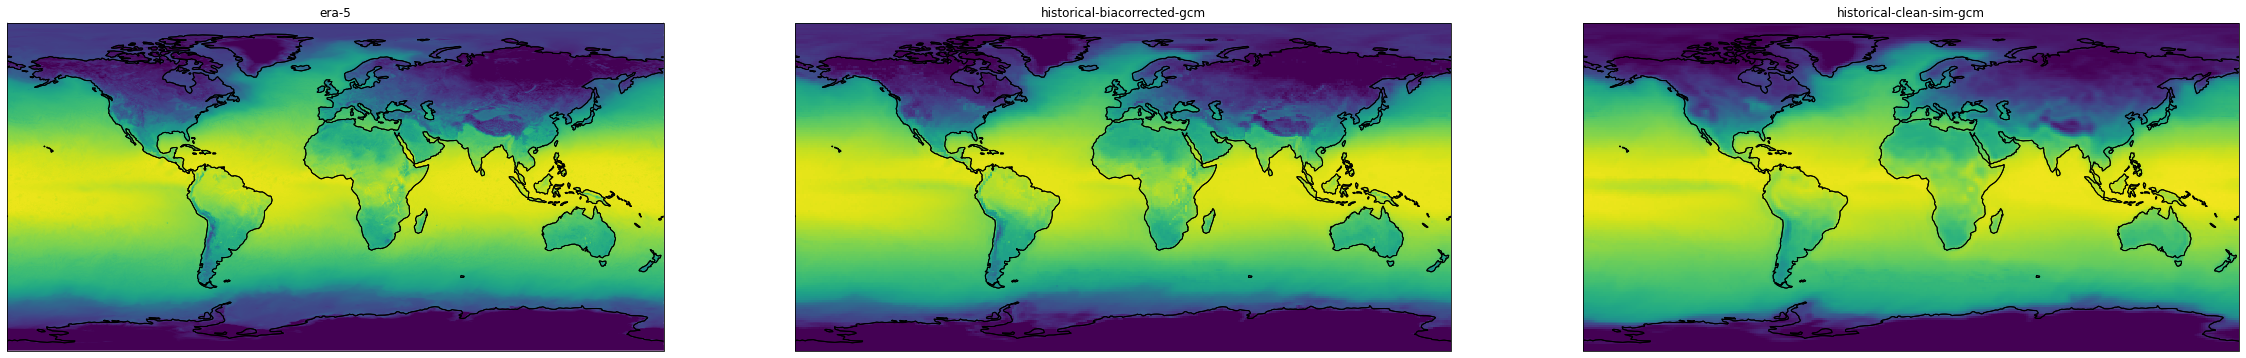

In [111]:
fig, axes = plt.subplots(1, len(ds_dict), figsize=(40, 40), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in ds_dict.items(): 
    axes[i].coastlines()
    da.min('time').plot.pcolormesh(ax=axes[i], add_colorbar=False, vmin=220, vmax=300); 
    axes[i].coastlines();
    axes[i].set_title(key)
    i = i + 1 

### maximum

/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/srv/conda/envs/notebook/lib/python3.8/si

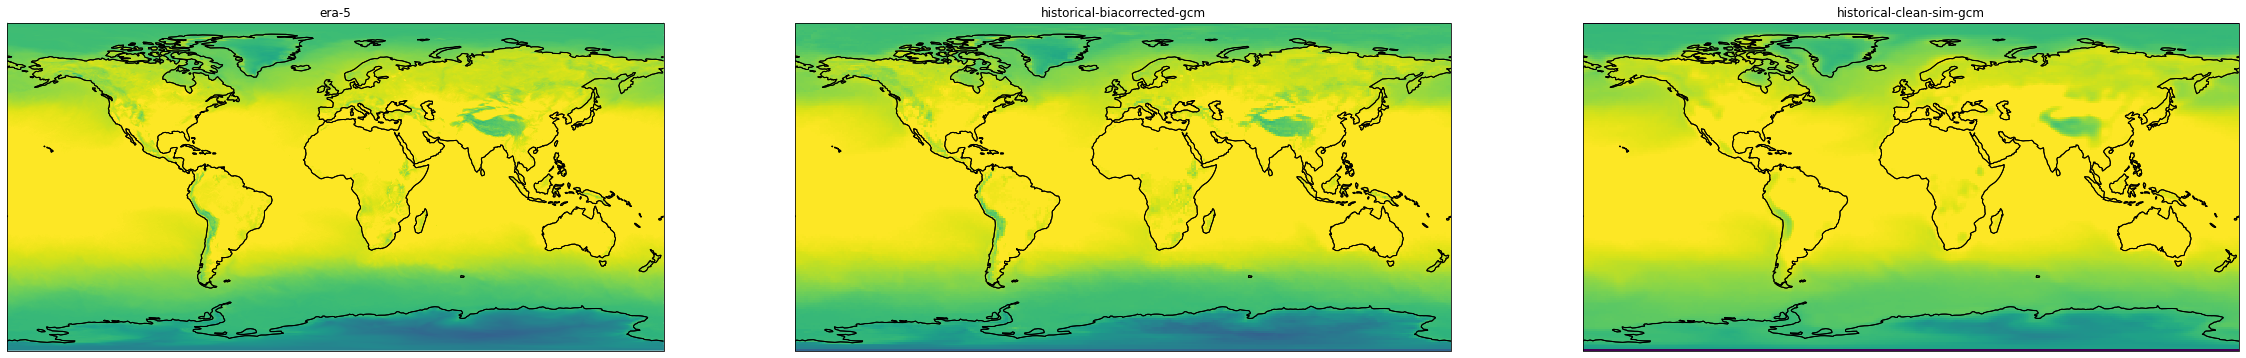

In [112]:
fig, axes = plt.subplots(1, len(ds_dict), figsize=(40, 40), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in ds_dict.items(): 
    axes[i].coastlines()
    da.max('time').plot.pcolormesh(ax=axes[i], add_colorbar=False, vmin=220, vmax=300); 
    axes[i].coastlines();
    axes[i].set_title(key)
    i = i + 1 

### mean

/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/srv/conda/envs/notebook/lib/python3.8/si

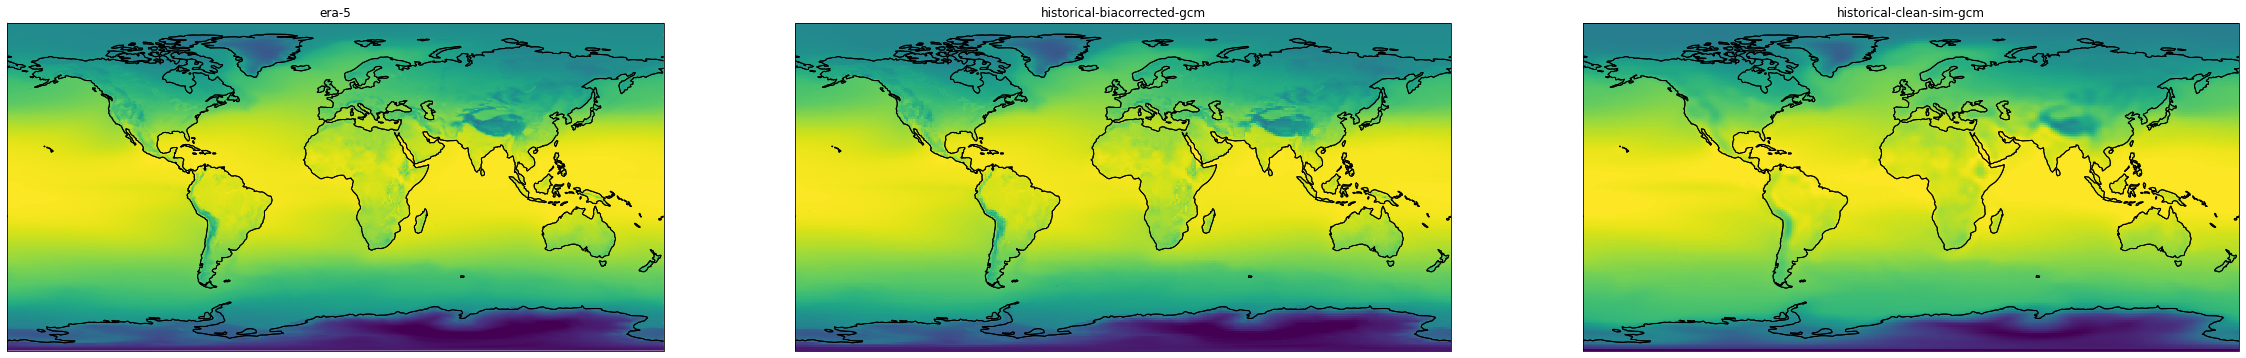

In [113]:
fig, axes = plt.subplots(1, len(ds_dict), figsize=(40, 40), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in ds_dict.items(): 
    axes[i].coastlines()
    da.mean('time').plot.pcolormesh(ax=axes[i], add_colorbar=False, vmin=220, vmax=300); 
    axes[i].coastlines();
    axes[i].set_title(key)
    i = i + 1 

## Trends preserved ? Comparing GCM trends pre and post bias correction 

### trend in maximum

In [131]:
trend_raw = ds_ssp370_clean_sim_gcm.max('time')-ds_historical_clean_sim_gcm.max('time')
trend_bs = ds_ssp370_bs_gcm.max('time')-ds_historical_bs_gcm.max('time')
ds_dict_tr = {
    'trend-raw': trend_raw,
    'trend-biascorrected': trend_bs
}

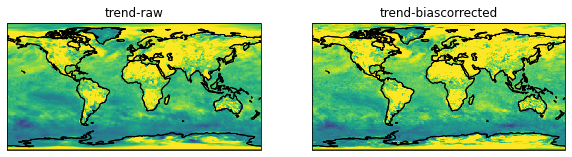

In [136]:
fig, axes = plt.subplots(1, len(ds_dict_tr), figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in ds_dict_tr.items(): 
    axes[i].coastlines()
    da.plot.pcolormesh(ax=axes[i], add_colorbar=False, vmin=-3, vmax=4); 
    axes[i].coastlines();
    axes[i].set_title(key)
    i = i + 1 

### minimum

In [137]:
trend_raw = ds_ssp370_clean_sim_gcm.min('time')-ds_historical_clean_sim_gcm.min('time')
trend_bs = ds_ssp370_bs_gcm.min('time')-ds_historical_bs_gcm.min('time')
ds_dict_tr = {
    'trend-raw': trend_raw,
    'trend-biascorrected': trend_bs
}

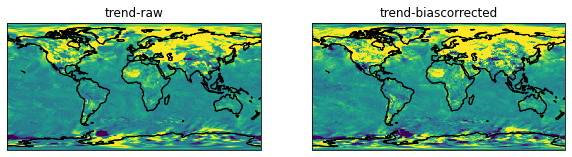

In [138]:
fig, axes = plt.subplots(1, len(ds_dict_tr), figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in ds_dict_tr.items(): 
    axes[i].coastlines()
    da.plot.pcolormesh(ax=axes[i], add_colorbar=False, vmin=-3, vmax=4); 
    axes[i].coastlines();
    axes[i].set_title(key)
    i = i + 1 

### mean

In [140]:
trend_raw = ds_ssp370_clean_sim_gcm.mean('time')-ds_historical_clean_sim_gcm.mean('time')
trend_bs = ds_ssp370_bs_gcm.mean('time')-ds_historical_bs_gcm.mean('time')
ds_dict_tr = {
    'trend-raw': trend_raw,
    'trend-biascorrected': trend_bs
}

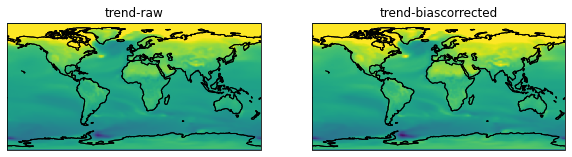

In [141]:
fig, axes = plt.subplots(1, len(ds_dict_tr), figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in ds_dict_tr.items(): 
    axes[i].coastlines()
    da.plot.pcolormesh(ax=axes[i], add_colorbar=False, vmin=-3, vmax=4); 
    axes[i].coastlines();
    axes[i].set_title(key)
    i = i + 1 

## Does downscaling preserve spatial patterns ?

### mean

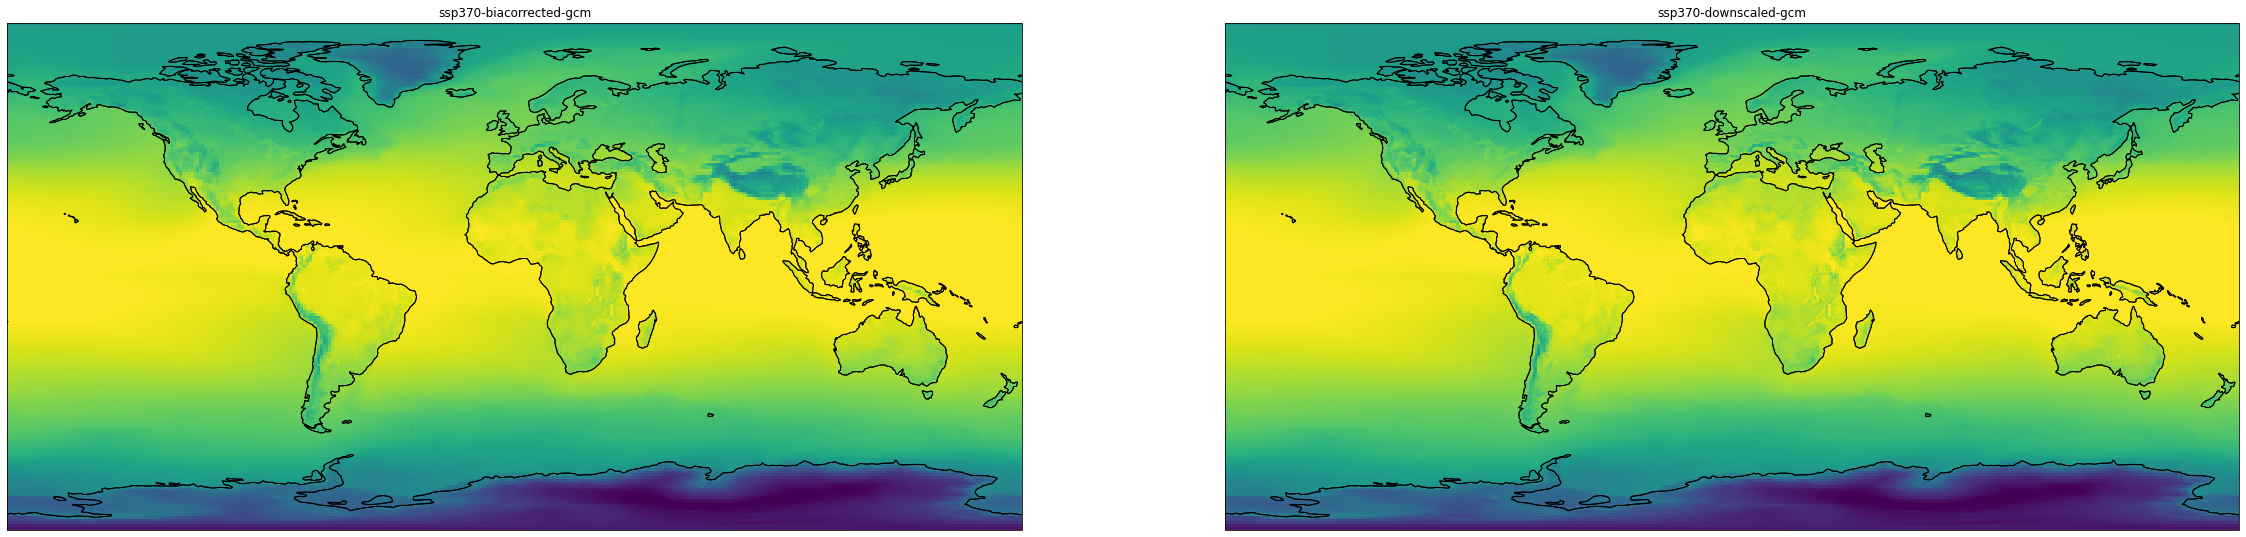

In [151]:
ds_dict = {    
    'ssp370-biacorrected-gcm':ds_ssp370_bs_gcm,  
    'ssp370-downscaled-gcm':ds_ssp370_dsc_gcm
}
fig, axes = plt.subplots(1, len(ds_dict), figsize=(40, 40), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in ds_dict.items(): 
    axes[i].coastlines()
    da.mean('time').plot.pcolormesh(ax=axes[i], add_colorbar=False, vmin=220, vmax=300); 
    axes[i].coastlines();
    axes[i].set_title(key)
    i = i + 1 

### max

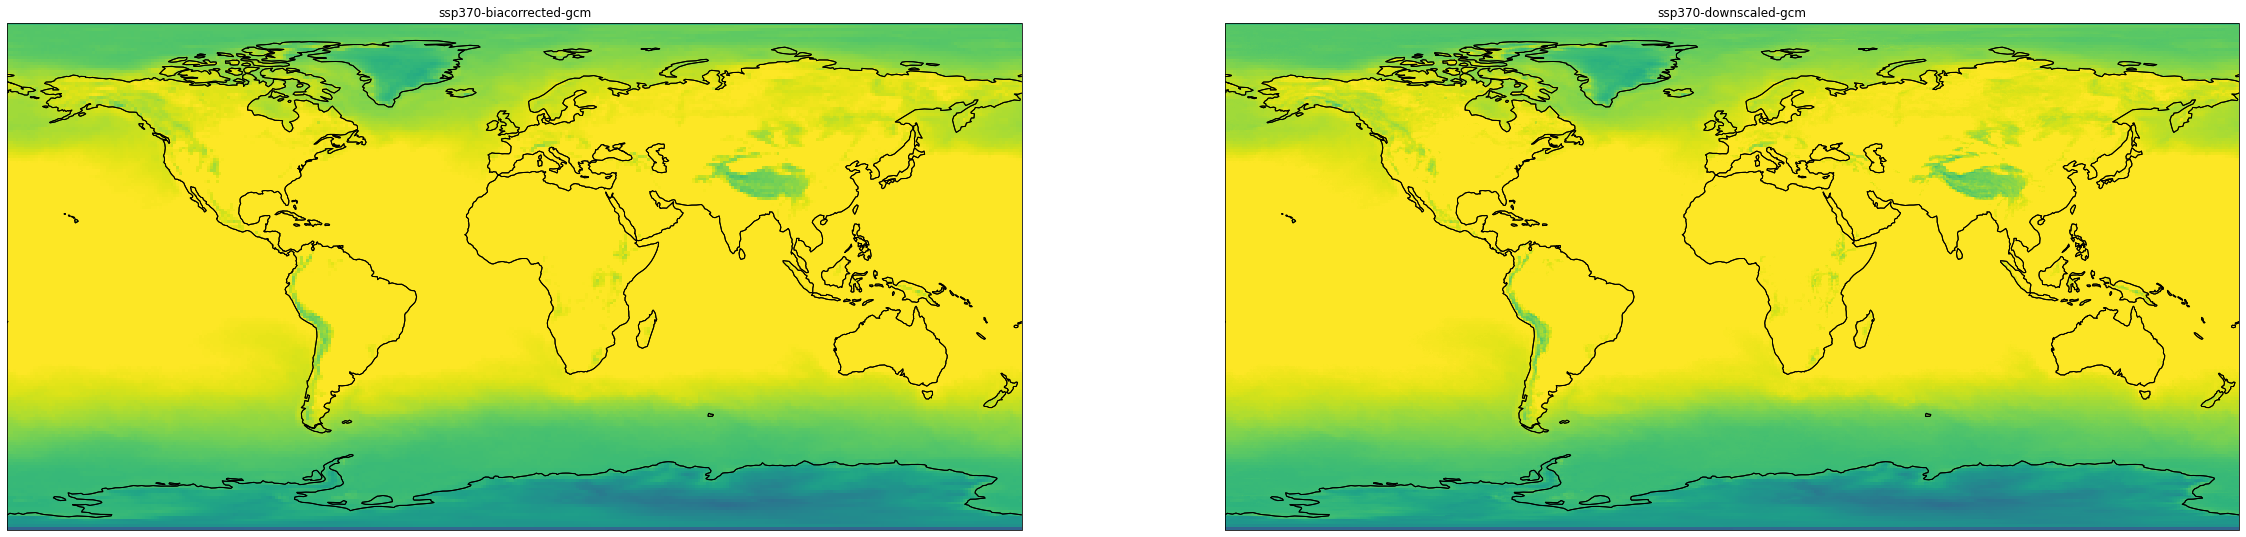

In [152]:
fig, axes = plt.subplots(1, len(ds_dict), figsize=(40, 40), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in ds_dict.items(): 
    axes[i].coastlines()
    da.max('time').plot.pcolormesh(ax=axes[i], add_colorbar=False, vmin=220, vmax=300); 
    axes[i].coastlines();
    axes[i].set_title(key)
    i = i + 1 

### min

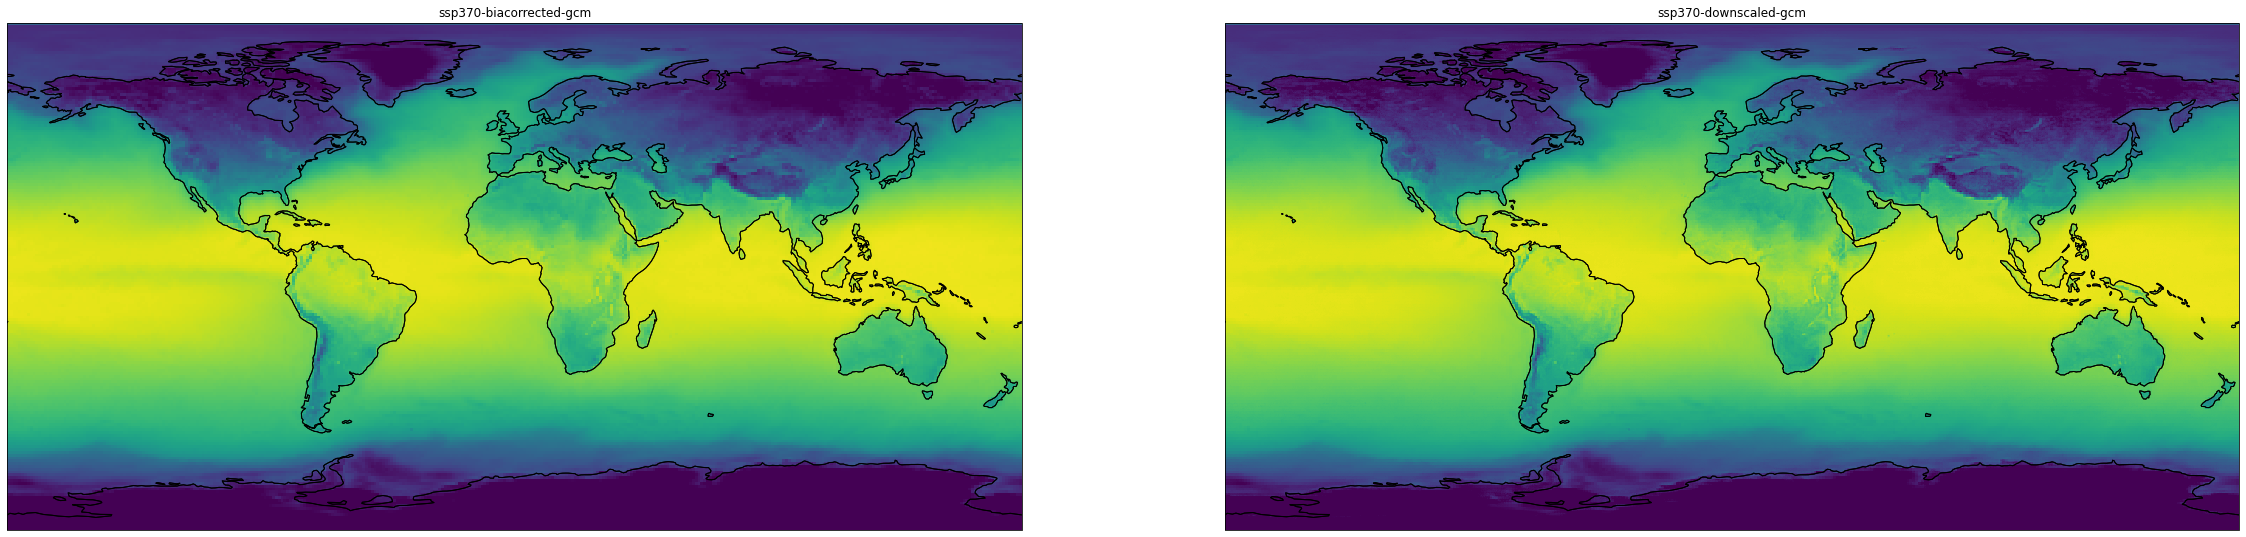

In [153]:
fig, axes = plt.subplots(1, len(ds_dict), figsize=(40, 40), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in ds_dict.items(): 
    axes[i].coastlines()
    da.min('time').plot.pcolormesh(ax=axes[i], add_colorbar=False, vmin=220, vmax=300); 
    axes[i].coastlines();
    axes[i].set_title(key)
    i = i + 1 

In [47]:
# ds_tasmin = read_gcs_zarr('gs://downscaled-288ec5ac/stage/CMIP/NCC/NorESM2-MM/historical/r1i1p1f1/day/tasmin/gn/v20220113042959.zarr')
# ds_tasmax = read_gcs_zarr('gs://downscaled-288ec5ac/stage/CMIP/NCC/NorESM2-MM/historical/r1i1p1f1/day/tasmax/gn/v20211202190858.zarr')


# ds_tasmin = read_gcs_zarr('gs://downscaled-288ec5ac/stage/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/day/tasmin/gr1/v20220113044908.zarr')
# ds_tasmax = read_gcs_zarr('gs://downscaled-288ec5ac/stage/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/day/tasmax/gr1/v20211209003119.zarr')


# ds_tasmin = read_gcs_zarr('gs://downscaled-288ec5ac/stage/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp370/r1i1p1f1/day/tasmin/gr1/v20220113044908.zarr')

# ds_tasmax = read_gcs_zarr('gs://downscaled-288ec5ac/stage/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp370/r1i1p1f1/day/tasmax/gr1/v20211209003119.zarr')

ds_tasmax = read_gcs_zarr('gs://clean-b1dbca25/cmip6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/day/tasmax/gr1/v20190726.zarr')

ds_tasmin = read_gcs_zarr('gs://clean-b1dbca25/cmip6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/day/tasmin/gr1/v20190726.zarr')

In [42]:
da_dtr = ds_tasmax['tasmax'] - ds_tasmin['tasmin'] # maximum - minimum shoud always be positive

In [43]:
counts = da_dtr.where(da_dtr > 0).isnull().sum('time')

Text(0.5, 1.0, 'number of days when (tasmax-tasmin) <= 0')

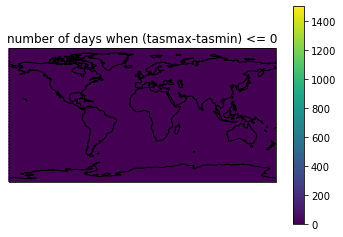

In [44]:
ax = plt.axes(projection=ccrs.PlateCarree())
counts.plot.pcolormesh(ax=ax, vmin=0, vmax=1500);
ax.coastlines();
plt.title('number of days when (tasmax-tasmin) <= 0')

In [31]:
averages = da_dtr.where(da_dtr <= 0).mean('time')

Text(0.5, 1.0, 'average (tasmax-tasmin) in days when (tasmax-tasmin) <= 0')

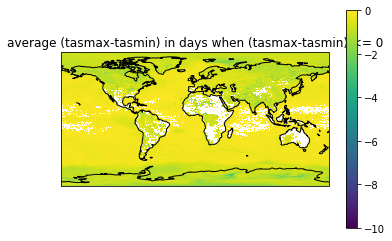

In [32]:
ax = plt.axes(projection=ccrs.PlateCarree())
averages.plot.pcolormesh(ax=ax, vmin=-10, vmax=0);
ax.coastlines();
plt.title('average (tasmax-tasmin) in days when (tasmax-tasmin) <= 0')

In [33]:
minima = da_dtr.min('time')

Exception in callback None()
handle: <Handle cancelled>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tornado/iostream.py", line 1391, in _do_ssl_handshake
    self.socket.do_handshake()
  File "/srv/conda/envs/notebook/lib/python3.8/ssl.py", line 1309, in do_handshake
    self._sslobj.do_handshake()
ssl.SSLCertVerificationError: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1131)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tornado/iostream.py", line 696, in _handle_events
    self._handle

CancelledError: ('_nanmin_skip-aggregate-43b6f80533e2653fa375befb02496f87', 141, 0)

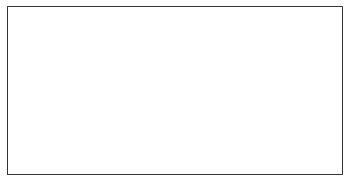

In [16]:
ax = plt.axes(projection=ccrs.PlateCarree())
minima.plot.pcolormesh(ax=ax, vmin=-20, vmax=0);
ax.coastlines();
plt.title('minimum (tasmax-tasmin)')

In [38]:
min = da_dtr.min().compute()

In [43]:
neg = da_dtr.where(da_dtr > 0).isnull().sum().compute()

In [45]:
pos = da_dtr.where(da_dtr <= 0).isnull().sum().compute()

In [47]:
pos/(pos+neg)

<xarray.DataArray ()>
array(0.97970488)

In [62]:
min

<xarray.DataArray ()>
array(-25.270508, dtype=float32)

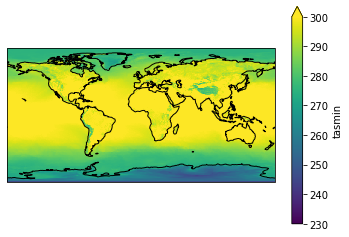

In [61]:
ax = plt.axes(projection=ccrs.PlateCarree())
ds['tasmin'].max('time').plot.pcolormesh(ax=ax, vmin=230, vmax=300);
ax.coastlines();

In [361]:
yr = '1972'

In [358]:
ref_zarr.where(ref_zarr['dtr'] < 2, drop=True).compute().values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  (time: 5721)
Coordinates:
    lat      float64 70.5
    lon      float64 41.5
  * time     (time) object 1994-01-02 00:00:00 ... 2015-12-31 00:00:00
Data variables:
    dtr      (time) float32 0.5103 0.6842 1.501 1.208 ... 1.753 1.497 1.398 1.05
Attributes:
    author:         Meredith Fish
    contact:        meredith.fish@rutgers.edu
    created:        2021-06-08
    method:         Changed calendar to no-leap and removed leap days
    project:        global downscaling [ERA-5]
    regrid_method:  bilinear
    source:         impactlab-data/climate/source-data/ERA-5/dtr/hourly/netcdf/>

In [360]:
ref_zarr_dis = ref_zarr['dtr'].where(((ref_zarr.time.dt.month==10) & (ref_zarr.time.dt.day >= 23)) | ((ref_zarr.time.dt.month==11) & (ref_zarr.time.dt.day <= 22)), drop=True)

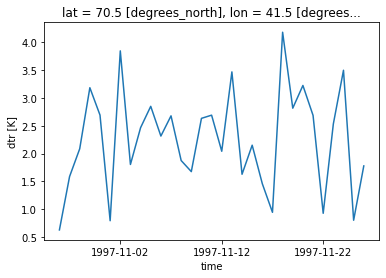

In [349]:
ref_zarr_dis.sel(time=slice(yr, yr)).plot()

In [350]:
train_zarr_dis = train_zarr['dtr'].where(((train_zarr.time.dt.month==10) & (train_zarr.time.dt.day >= 27)) | ((train_zarr.time.dt.month==11) & (train_zarr.time.dt.day <= 26)), drop=True)

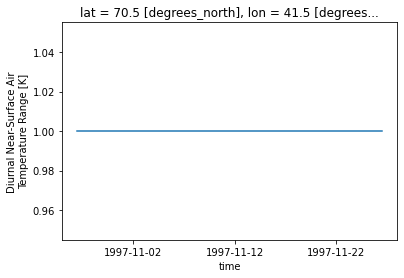

In [351]:
train_zarr_dis.sel(time=slice(yr, yr)).plot()

In [362]:
yr = '1972'

In [363]:
hist_dis = hist['dtr'].where(((hist.time.dt.month==10) & (hist.time.dt.day >= 23)) | ((hist.time.dt.month==11) & (hist.time.dt.day <= 22)), drop=True)

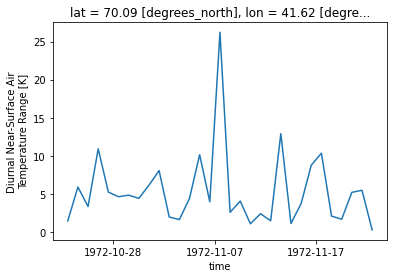

In [364]:
hist_dis.sel(time=slice(yr, yr)).plot()

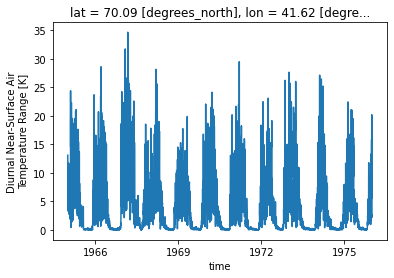

In [386]:
hist['dtr'].sel(time=slice(str(1965), str(1975))).plot()

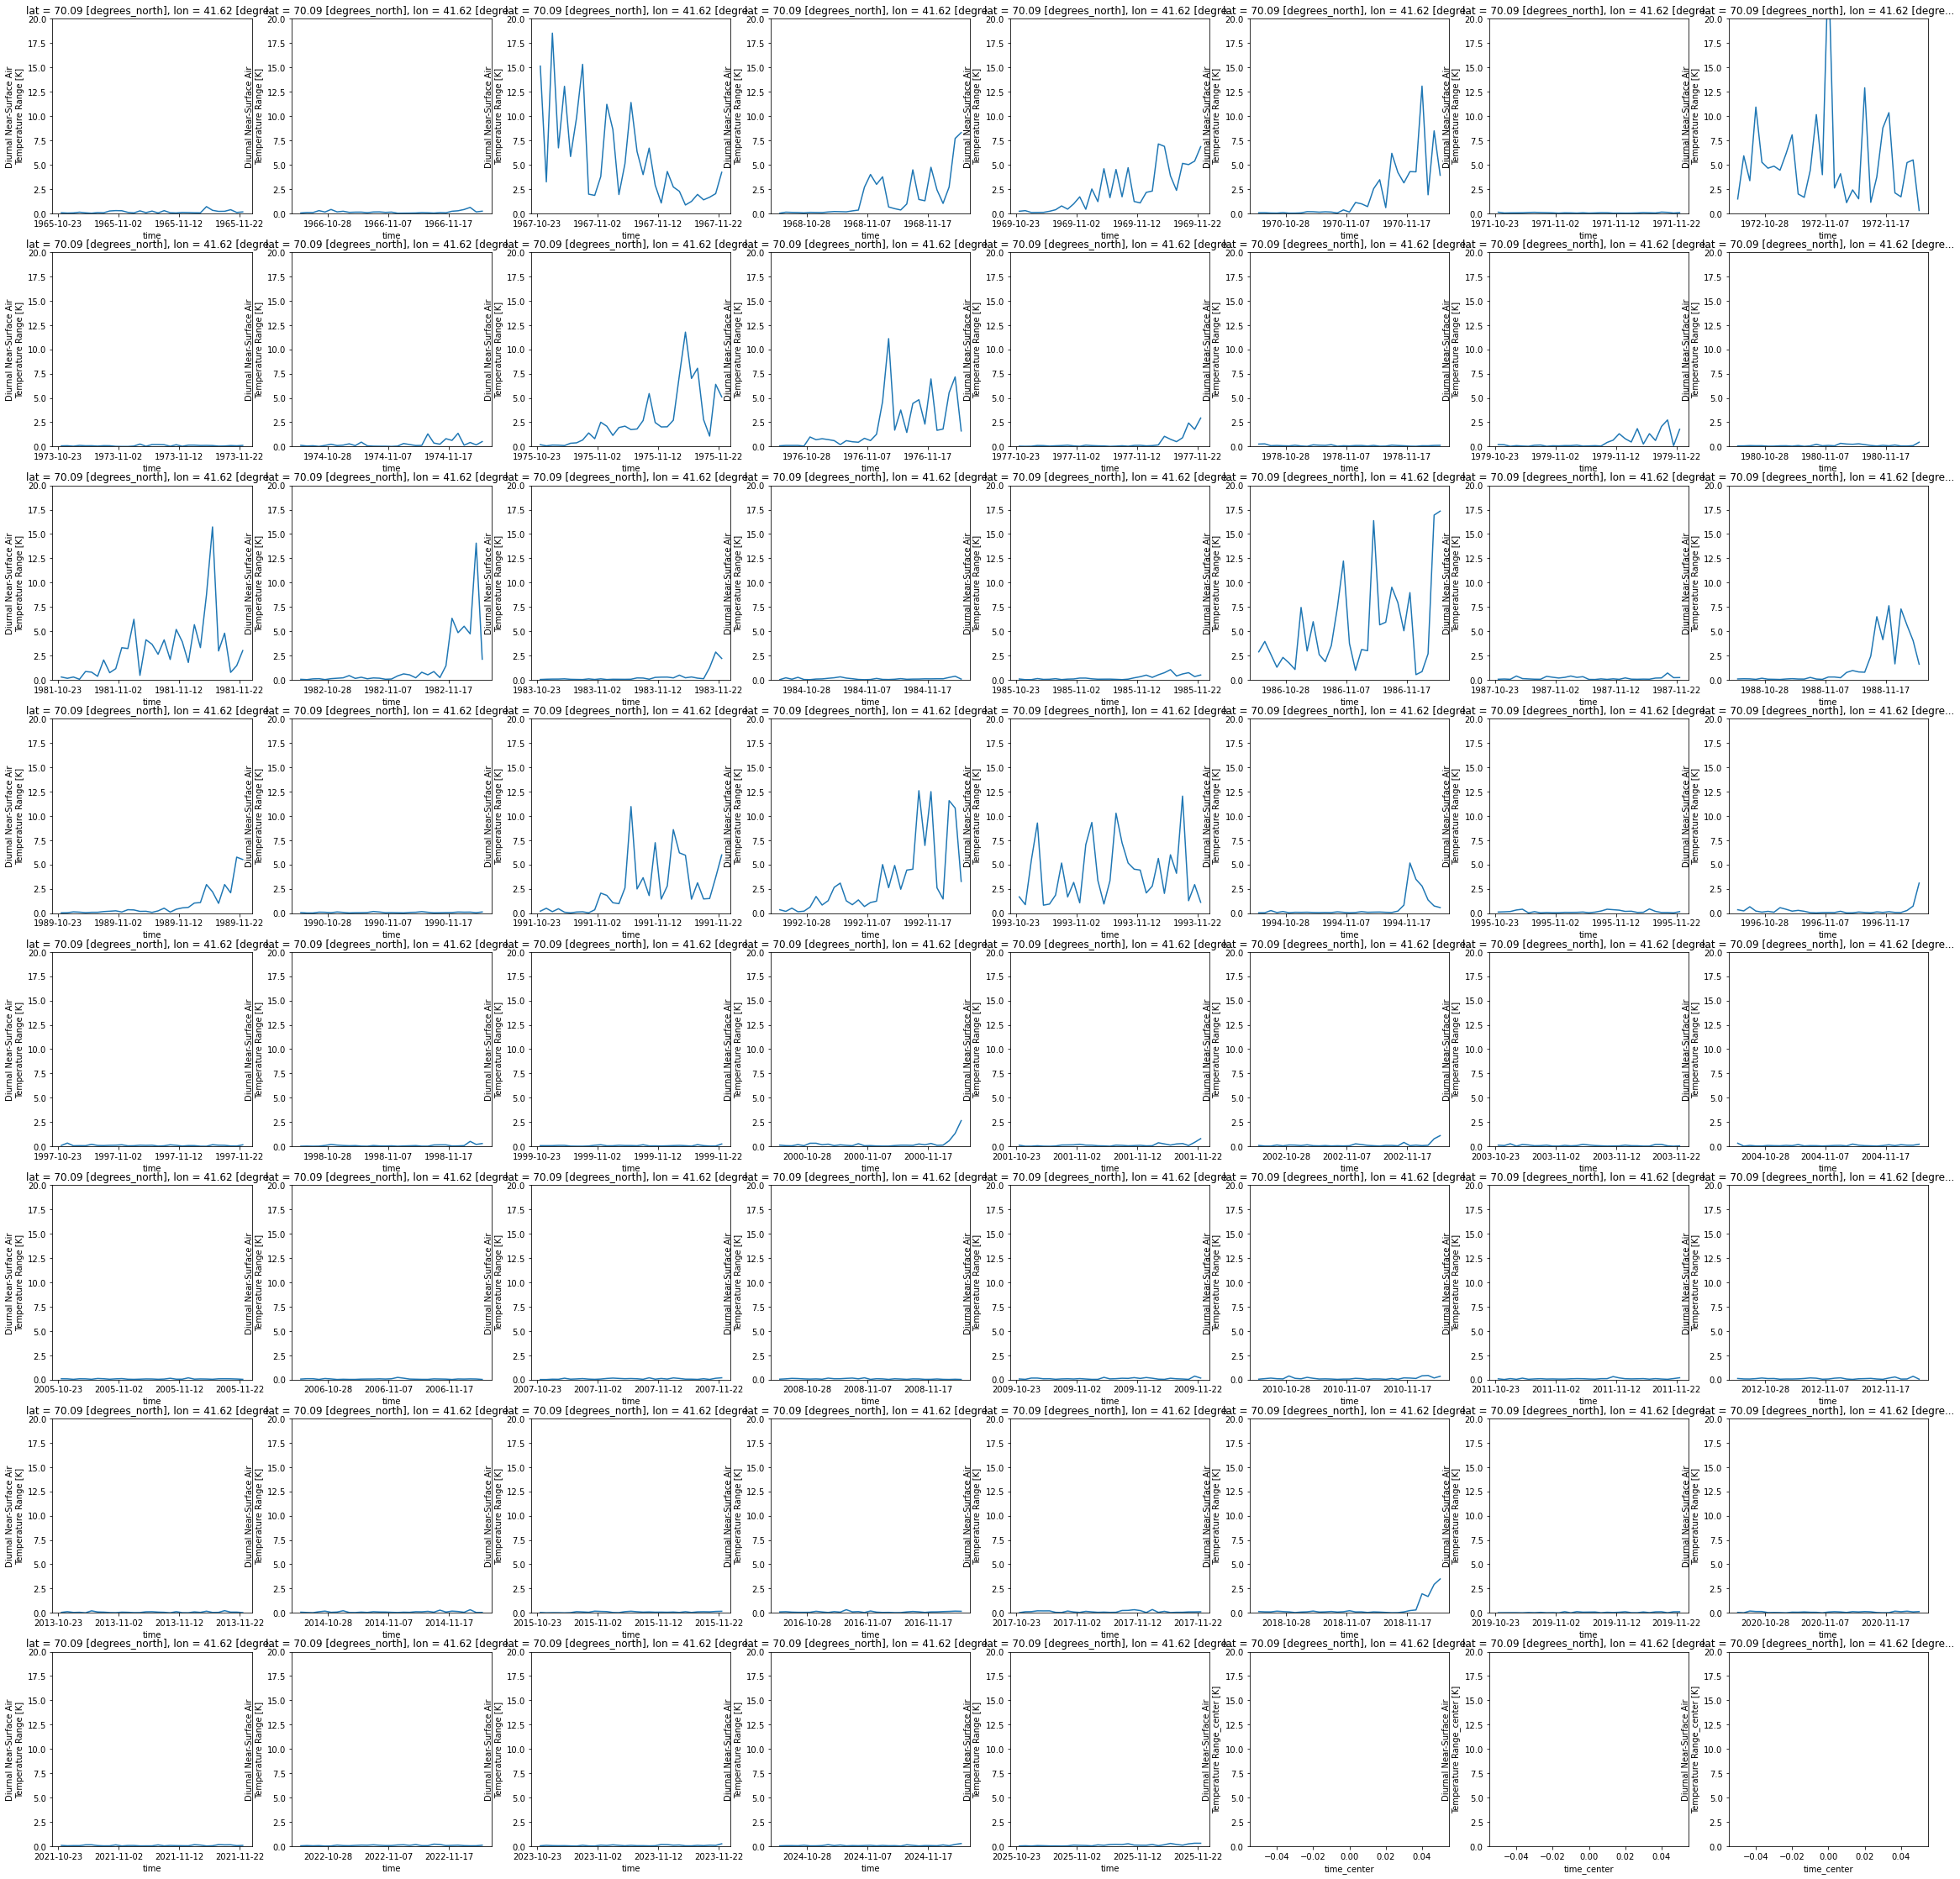

In [381]:
# make little maps
yr = 1965
fig, axes = plt.subplots(8, 8, figsize=(40, 40))
for i in range(0, 8):
    for j in range(0,8):
        hist_dis.sel(time=slice(str(yr), str(yr))).plot(ax=axes[i,j], ylim=(0,20))
        yr = yr + 1 

In [355]:
bc_dis = bc['dtr'].where(((bc.time.dt.month==10) & (bc.time.dt.day >= 27)) | ((bc.time.dt.month==11) & (bc.time.dt.day <= 26)), drop=True)

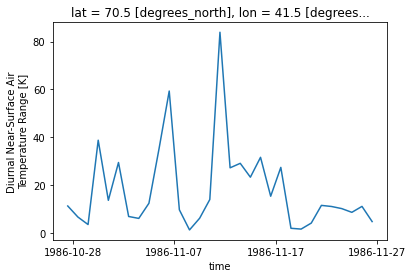

In [356]:
bc_dis.sel(time=slice(yr, yr)).plot()

In [222]:
coords = (70.5, 41.5) # Barents Sea, wild in BCC-CSM2
# coords = (48.5,  2.5) # Paris
# coords = (37.5, 127.5) # Seoul
# coords = (-65.5,   79.5) # NE Antarctica
# coords = (42.5, -71.5) # Boston
# coords = (61.5, -58.5) # Labrador Sea

In [223]:
ref_zarr = read_gcs_zarr('gs://scratch-170cd6ec/643c4b73-399d-427a-87be-cc0ab1b401d9/e2e-bcc-csm2-mr-dtr-qxg22-3765427254/rechunked.zarr').sel(lat=coords[0], lon=coords[1])
train_zarr = read_gcs_zarr('gs://scratch-170cd6ec/643c4b73-399d-427a-87be-cc0ab1b401d9/e2e-bcc-csm2-mr-dtr-qxg22-1919188485/thresholded.zarr').sel(lat=coords[0], lon=coords[1])
sim_zarr = read_gcs_zarr('gs://scratch-170cd6ec/643c4b73-399d-427a-87be-cc0ab1b401d9/e2e-bcc-csm2-mr-dtr-qxg22-3490169582/thresholded.zarr').sel(lat=coords[0], lon=coords[1])

In [224]:
bc = read_gcs_zarr('gs://biascorrected-492e989a/stage/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/day/dtr/gn/v20211230093107.zarr').sel(lat=coords[0], lon=coords[1])

In [225]:
hist = read_gcs_zarr('gs://clean-b1dbca25/cmip6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/day/dtr/gn/v20181126.zarr').sel(lat=coords[0], lon=coords[1], method='nearest')

In [ ]:
years = ('2003', '2007')
plt.figure(figsize=(18, 6))
ref_zarr['dtr'].sel(time=slice(years[0], years[1])).plot(label='era-5', linewidth=0.5)
#bc['dtr'].sel(time=slice(years[0], years[1])).plot(label='biascorrected bcc-csm2', linewidth=0.8)
hist['dtr'].sel(time=slice(years[0], years[1])).plot(label='clean bcc-csm2', linestyle=':', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('daily DTR (K)')
plt.title(f'{years[0]}-{years[1]} - lat={coords[0]}, lon={coords[1]}')

In [165]:
qdm = xclim.sdba.adjustment.QuantileDeltaMapping.train(
    ref=ref_zarr['dtr'],
    hist=train_zarr['dtr'],
    kind="*",
    nquantiles=100,
    group=xclim.sdba.Grouper('time.dayofyear')
)

In [168]:
adj = qdm.adjust(train_zarr['dtr'], interp='nearest', extrapolation='constant')

In [176]:
bc['dtr'].where(bc['dtr']>130, drop=True).compute()

<xarray.DataArray 'dtr' (time: 1)>
array([136.9847], dtype=float32)
Coordinates:
    lat      float64 70.5
    lon      float64 41.5
  * time     (time) object 1972-11-07 12:00:00
Attributes:
    long_name:      Diurnal Near-Surface Air Temperature Range
    original_name:  dtr
    standard_name:  air_temperature
    units:          K

# Some regridding learning

In [71]:
ds = xr.tutorial.open_dataset('air_temperature') # use xr.tutorial.load_dataset() for xarray<v0.11.0

In [72]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [10]:
dr = ds['air']  # get a DataArray

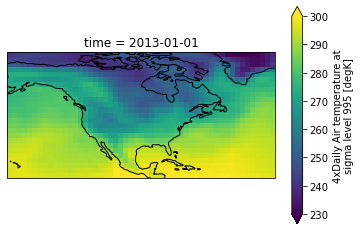

In [11]:
ax = plt.axes(projection=ccrs.PlateCarree())
dr.isel(time=0).plot.pcolormesh(ax=ax, vmin=230, vmax=300);
ax.coastlines();

In [12]:
ds_out = xr.Dataset({'lat': (['lat'], np.arange(16, 75, 1.0)),
                     'lon': (['lon'], np.arange(200, 330, 1.5)),
                    }
                   )
ds_out

<xarray.Dataset>
Dimensions:  (lat: 59, lon: 87)
Coordinates:
  * lat      (lat) float64 16.0 17.0 18.0 19.0 20.0 ... 70.0 71.0 72.0 73.0 74.0
  * lon      (lon) float64 200.0 201.5 203.0 204.5 ... 324.5 326.0 327.5 329.0
Data variables:
    *empty*

In [13]:
regridder = xesmf.Regridder(ds, ds_out, 'bilinear')

In [14]:
regridder

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_25x53_59x87.nc 
Reuse pre-computed weights? False 
Input grid shape:           (25, 53) 
Output grid shape:          (59, 87) 
Periodic in longitude?      False

In [16]:
dr_out = regridder(dr)

In [ ]:
dr_out

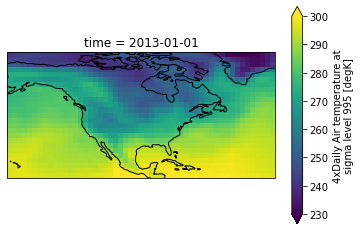

In [19]:
ax = plt.axes(projection=ccrs.PlateCarree())
dr.isel(time=0).plot.pcolormesh(ax=ax, vmin=230, vmax=300);
ax.coastlines();

ax = plt.axes(projection=ccrs.PlateCarree())
dr_out.isel(time=0).plot.pcolormesh(ax=ax, vmin=230, vmax=300);
ax.coastlines();

In [21]:
ds_curvy = xr.tutorial.open_dataset('rasm')

In [22]:
ds_curvy

<xarray.Dataset>
Dimensions:  (time: 36, y: 205, x: 275)
Coordinates:
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 ...
    yc       (y, x) float64 ...
Dimensions without coordinates: y, x
Data variables:
    Tair     (time, y, x) float64 ...
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 4.7.9 (Homepage = htt...
    history:                   Fri Aug  7 17:57:38 2020: ncatted -a bounds,,d...

In [ ]:
plt.figure(figsize=(12,2));
ax = plt.axes(projection=ccrs.PlateCarree());
ds_curvy['Tair'][0].plot.pcolormesh(ax=ax, x='xc', y='yc');
ax.coastlines();

In [ ]:
ds_curvy['xc']

In [ ]:
ds_curvy['yc']

# Diagnosing ERA-5 regridding with near-Seattle cells

In [5]:
def lon360(lon180):
    return ((360 + (lon180 % 360)) % 360)

In [6]:
def lon180(lon360):
    if (lon360 > 180.0):
        return lon360 - 360.0
    else:
        return lon360

In [7]:
# load ERA-5 versions 
# ERA-5 "coarse" and "fine" (both at 1/4 degree) used in downscaling -- BEFORE wetday correction. 
pr_coarse_ref = read_gcs_zarr('gs://scratch-170cd6ec/6447567c-320f-4dea-ba65-8337b4376192/biascorrectdownscale-precipitation-jczlx-2742896890/rechunked.zarr')
pr_fine_ref = read_gcs_zarr('gs://scratch-170cd6ec/6447567c-320f-4dea-ba65-8337b4376192/biascorrectdownscale-precipitation-jczlx-1940554070/rechunked.zarr')
# ERA-5 at regular Gaussian resolution, "cleaned" by renaming variable/dims 
pr_cleaned_ref = read_gcs_zarr('gs://clean-b1dbca25/reanalysis/ERA-5/F320/pr.1995-2015.F320.zarr')
# ERA-5 at regular Gaussian resolution
pr_raw_ref = read_gcs_zarr('gs://impactlab-data/climate/source_data/ERA-5/downscaling/pr.1994-2015.F320.v5.zarr')
# define Seattle lat/lon 
target_lat = 47.608013
target_lon = -122.335167 

In [8]:
# now get Seattle timeseries from each of these ERA-5 versions.
# two of the datasets have [0,360] ranging longitude, need to convert. 
pr_seattle_pipeline = pr_cleaned_ref['pr'].sel(lon=lon360(target_lon), lat=target_lat, method="nearest").load()
pr_seattle_pipeline_coarse = pr_coarse_ref['pr'].sel(lon=target_lon, lat=target_lat, method="nearest").load()
pr_seattle_pipeline_fine = pr_fine_ref['pr'].sel(lon=target_lon, lat=target_lat, method="nearest").load()
pr_seattle_pipeline_raw = pr_raw_ref['tp'].sel(longitude=lon360(target_lon), latitude=target_lat, method="nearest").load()

In [124]:
pr_seattle_pipeline_wetday_corrected = pr_seattle_pipeline.where(
    pr_seattle_pipeline > 1.0, np.random.uniform(low=0.5, high=1.0)
)

Text(0.5, 1.0, 'Seattle annual precip')

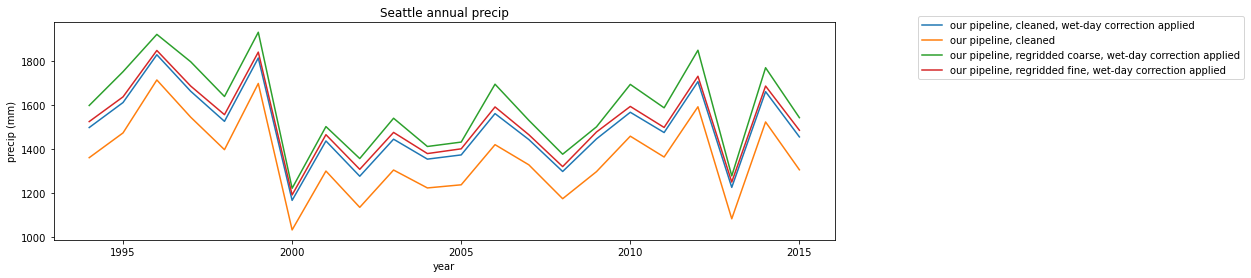

In [125]:
plt.figure(figsize=(14, 4))
pr_seattle_pipeline_wetday_corrected.groupby('time.year').sum().plot(label='our pipeline, cleaned, wet-day correction applied')
pr_seattle_pipeline.groupby('time.year').sum().plot(label='our pipeline, cleaned')
#pr_seattle_pipeline_raw.groupby('time.year').sum().plot(label='our pipeline, raw', linestyle=':')
pr_seattle_pipeline_coarse.groupby('time.year').sum().plot(label='our pipeline, regridded coarse, wet-day correction applied')
pr_seattle_pipeline_fine.groupby('time.year').sum().plot(label='our pipeline, regridded fine, wet-day correction applied')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('precip (mm)')
plt.title('Seattle annual precip')

In [10]:
dict_of_da = {'cleaned':pr_seattle_pipeline, 
              'regridded_coarse':pr_seattle_pipeline_coarse,
              'regridded_fine':pr_seattle_pipeline_fine}

In [211]:
for key, da in dict_of_da.items():
    print(key)
    res = {
        'zeros_pct': da.where(da>=0.254).isnull().sum().values.item()/len(da.time.values),
        'min': da.min().compute().values.item(),
        'q1': da.quantile(0.01).compute().values.item(),
        'q10': da.quantile(0.10).compute().values.item(),
        'q50': da.quantile(0.5).compute().values.item(),
        'q90': da.quantile(0.10).compute().values.item(),
        'q99': da.quantile(0.99).compute().values.item(),
        'max': da.max().compute().values.item(),
        'mean': da.mean().compute().values.item(),
        'year_sum_min' : da.groupby('time.year').sum().min().compute().values.item(),
        'year_sum_mean' : da.groupby('time.year').sum().mean().compute().values.item(),
        'year_sum_max' : da.groupby('time.year').sum().max().compute().values.item()
    }
    for r in res:
        res[r] = round(res[r], 3)
    print(res)

cleaned
{'zeros_pct': 0.409, 'min': 0.0, 'q1': 0.0, 'q10': 0.0, 'q50': 0.833, 'q90': 0.0, 'q99': 30.693, 'max': 79.769, 'mean': 3.734, 'year_sum_min': 1034.107, 'year_sum_mean': 1362.967, 'year_sum_max': 1713.917}
regridded_coarse
{'zeros_pct': 0.0, 'min': 0.891, 'q1': 0.891, 'q10': 0.891, 'q50': 1.355, 'q90': 0.891, 'q99': 32.937, 'max': 77.529, 'mean': 4.525, 'year_sum_min': 1289.435, 'year_sum_mean': 1651.516, 'year_sum_max': 1986.646}
regridded_fine
{'zeros_pct': 0.0, 'min': 0.836, 'q1': 0.836, 'q10': 0.836, 'q50': 0.864, 'q90': 0.836, 'q99': 30.236, 'max': 79.602, 'mean': 4.088, 'year_sum_min': 1165.235, 'year_sum_mean': 1491.943, 'year_sum_max': 1823.364}


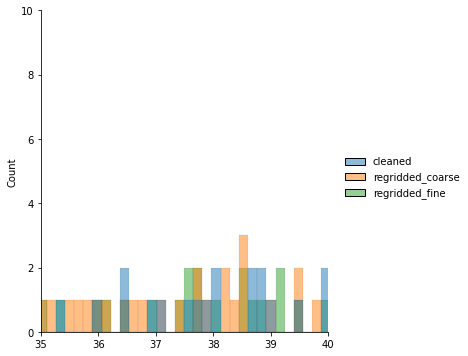

In [21]:
import seaborn
pl = seaborn.displot(dict_of_da, bins=500)
pl.set(xlim=(35,40), ylim=(0,10))

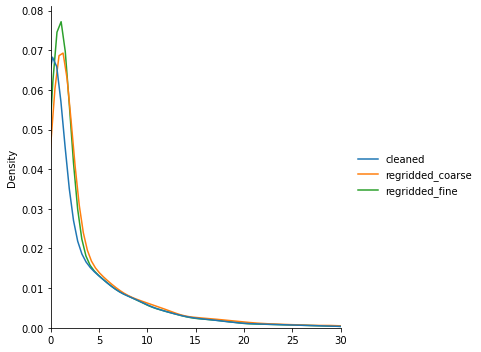

In [253]:
pl = seaborn.displot(dict_of_da, kind='kde')
pl.set(xlim=(0,30))

# Regridding tests with ERA-5 (conservative and bilinear)

In [165]:
# to regrid
ds_in = pr_cleaned_ref
ds_in

<xarray.Dataset>
Dimensions:  (lat: 640, lon: 1280, time: 8030)
Coordinates:
  * lat      (lat) float32 89.78 89.51 89.23 88.95 ... -89.23 -89.51 -89.78
  * lon      (lon) float32 0.0 0.2813 0.5625 0.8438 ... 358.9 359.2 359.4 359.7
  * time     (time) object 1994-01-01 00:00:00 ... 2015-12-31 00:00:00
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(365, 640, 1280), meta=np.ndarray>

In [209]:
# defining a small domain around Seattle 
small_domain = {
    'lat': (30., 65.),
    'lon': (lon360(-140.), lon360(-115.))
}

In [210]:
vec_lon360 = np.vectorize(lon360)

In [214]:
# defining target grid at different resolutions
target_domains = {}
for res in [0.25, 0.5, 1]:
    target_domains[str(res)] = xr.Dataset(
        {
            'lat': (['lat'], np.arange(small_domain['lat'][0], small_domain['lat'][1], res)) ,
            'lon': (['lon'], np.arange(small_domain['lon'][0], small_domain['lon'][1], res))
        }
    )

In [212]:
# subsetting that domain in source data 
source_domain = ds_in.sel(lat=slice(small_domain['lat'][1], small_domain['lat'][0]), lon=slice(small_domain['lon'][0], small_domain['lon'][1]))

In [224]:
# perform at various resolutions 
outputs = {}
outputs['1'] = xesmf.Regridder(source_domain, target_domains['1'], 'bilinear')(source_domain['pr'])
outputs['0.5'] = xesmf.Regridder(source_domain, target_domains['0.5'], 'bilinear')(source_domain['pr'])
outputs['0.25'] = xesmf.Regridder(source_domain, target_domains['0.25'], 'bilinear')(source_domain['pr'])
outputs['1-0.25'] = xesmf.Regridder(outputs['1'], target_domains['0.25'], 'bilinear')(outputs['1'])

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/core.py:405: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


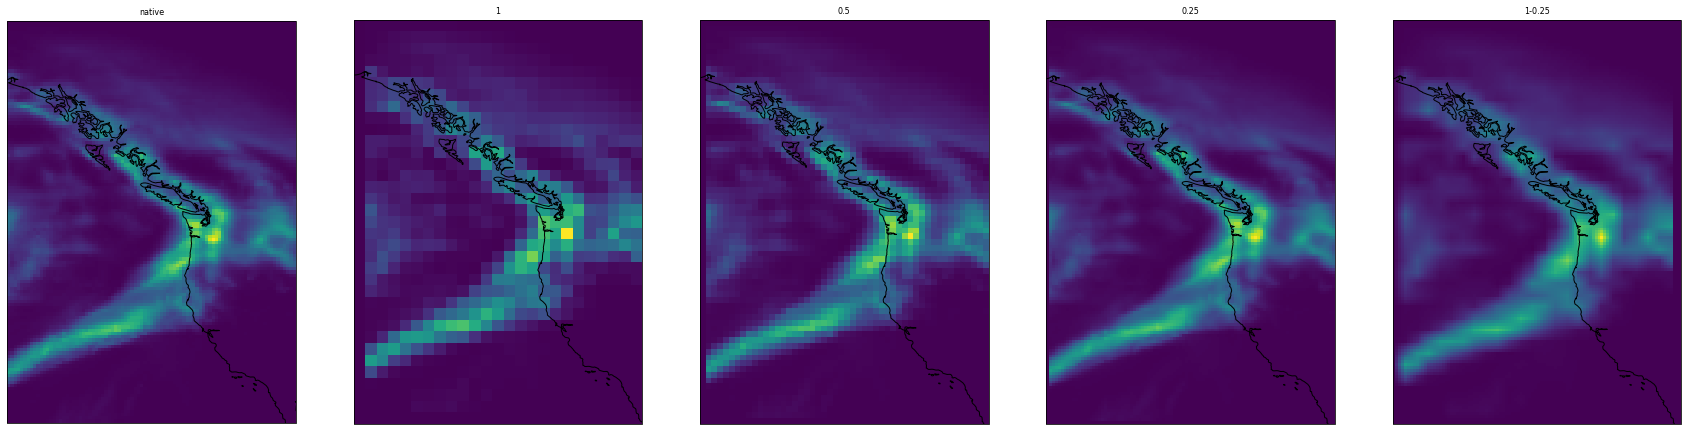

In [225]:
# make little maps
fig, axes = plt.subplots(1, 5, figsize=(30, 10), subplot_kw={'projection': ccrs.PlateCarree()})
source_domain['pr'].isel(time=0).plot.pcolormesh(ax=axes[0], add_colorbar=False);  
axes[0].coastlines();
axes[0].set_title("native", fontsize=8)
for i, key in enumerate(outputs):
    outputs[key].isel(time=0).plot.pcolormesh(ax=axes[i+1], add_colorbar=False);  
    axes[i+1].coastlines();
    axes[i+1].set_title(str(key), fontsize=8)

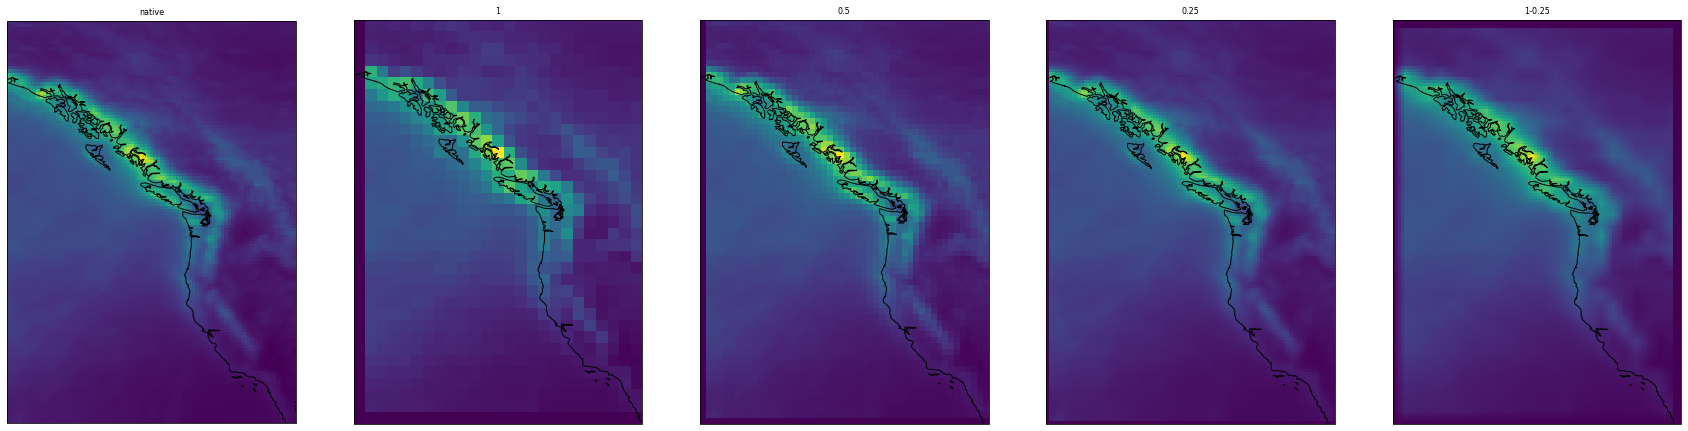

In [243]:
# same but with the first year total rainfall
fig, axes = plt.subplots(1, 5, figsize=(30, 10), subplot_kw={'projection': ccrs.PlateCarree()})
source_domain['pr'].groupby('time.year').sum().isel(year=0).plot.pcolormesh(ax=axes[0], add_colorbar=False);  
axes[0].coastlines();
axes[0].set_title("native", fontsize=8)
for i, key in enumerate(outputs):
    outputs[key].groupby('time.year').sum().isel(year=0).plot.pcolormesh(ax=axes[i+1], add_colorbar=False);  
    axes[i+1].coastlines();
    axes[i+1].set_title(str(key), fontsize=8)

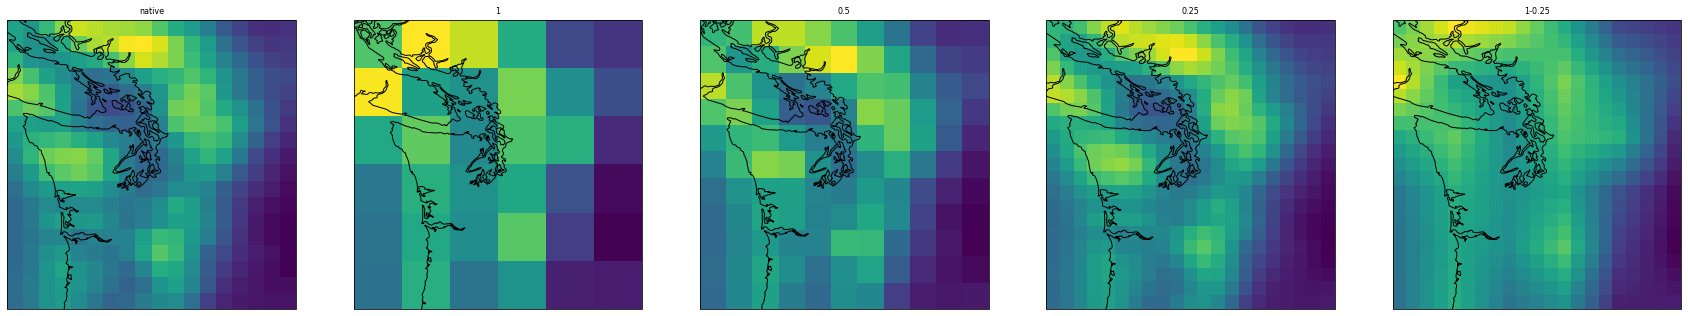

In [247]:
# zoom in 
fig, axes = plt.subplots(1, 5, figsize=(30, 10), subplot_kw={'projection': ccrs.PlateCarree()})
source_domain['pr'].groupby('time.year').sum().isel(year=0).sel(lat=slice(50, 45), lon=slice(235, 240)).plot.pcolormesh(ax=axes[0], add_colorbar=False);  
axes[0].coastlines();
axes[0].set_title("native", fontsize=8)
for i, key in enumerate(outputs):
    outputs[key].groupby('time.year').sum().isel(year=0).sel(lat=slice(45, 50), lon=slice(235, 240)).plot.pcolormesh(ax=axes[i+1], add_colorbar=False);  
    axes[i+1].coastlines();
    axes[i+1].set_title(str(key), fontsize=8)

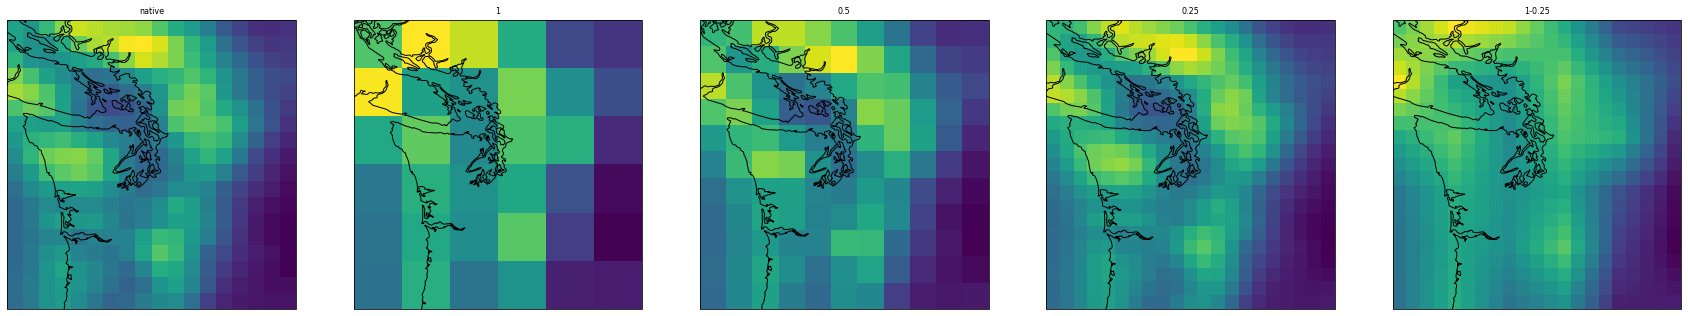

In [242]:
# zoom in, first year
fig, axes = plt.subplots(1, 5, figsize=(30, 10), subplot_kw={'projection': ccrs.PlateCarree()})
source_domain['pr'].groupby('time.year').sum().isel(year=0).sel(lat=slice(50, 45), lon=slice(235, 240)).plot.pcolormesh(ax=axes[0], add_colorbar=False);  
axes[0].coastlines();
axes[0].set_title("native", fontsize=8)
for i, key in enumerate(outputs):
    outputs[key].groupby('time.year').sum().isel(year=0).sel(lat=slice(45, 50), lon=slice(235, 240)).plot.pcolormesh(ax=axes[i+1], add_colorbar=False);  
    axes[i+1].coastlines();
    axes[i+1].set_title(str(key), fontsize=8)

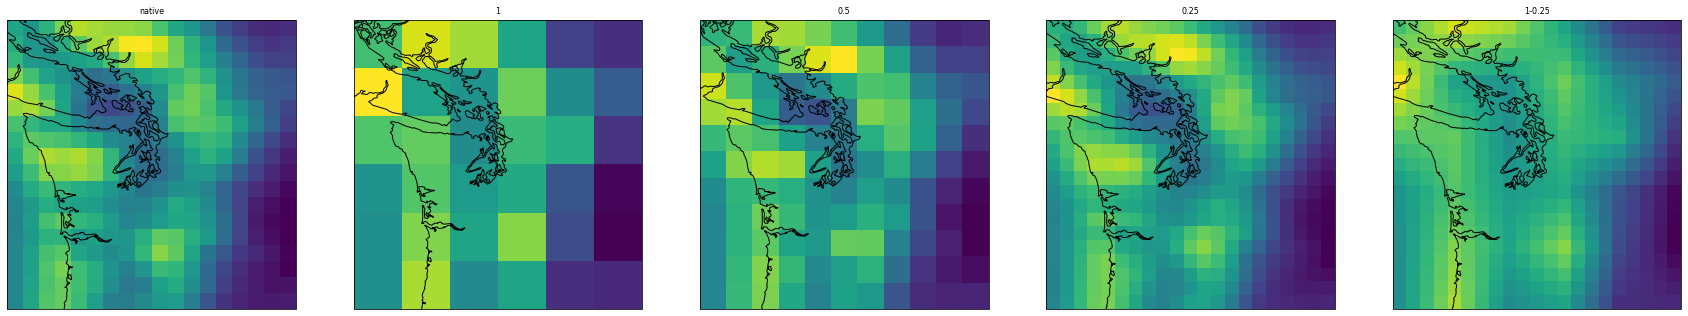

In [244]:
# zoom in, fifth year
fig, axes = plt.subplots(1, 5, figsize=(30, 10), subplot_kw={'projection': ccrs.PlateCarree()})
source_domain['pr'].groupby('time.year').sum().isel(year=4).sel(lat=slice(50, 45), lon=slice(235, 240)).plot.pcolormesh(ax=axes[0], add_colorbar=False);  
axes[0].coastlines();
axes[0].set_title("native", fontsize=8)
for i, key in enumerate(outputs):
    outputs[key].groupby('time.year').sum().isel(year=4).sel(lat=slice(45, 50), lon=slice(235, 240)).plot.pcolormesh(ax=axes[i+1], add_colorbar=False);  
    axes[i+1].coastlines();
    axes[i+1].set_title(str(key), fontsize=8)

In [227]:
# now get Seattle timeseries from each of these ERA-5 versions.
# two of the datasets have [0,360] ranging longitude, need to convert. 
outputs_around_seattle = {}
for key, val in outputs.items():
    outputs_around_seattle[key] = val.sel(lon=lon360(target_lon), lat=target_lat, method="nearest").load()

Text(0.5, 1.0, 'Seattle annual precip, various manual regridding from "native" ERA-5')

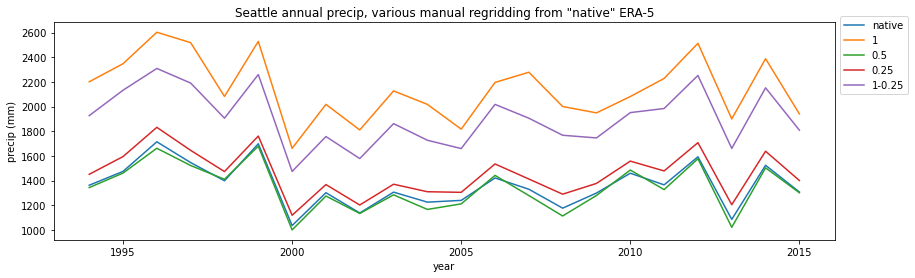

In [228]:
plt.figure(figsize=(14, 4))
source_domain['pr'].sel(lon=lon360(target_lon), lat=target_lat, method="nearest").load().groupby('time.year').sum().plot(label='native')
for key, val in outputs_around_seattle.items():
        val.groupby('time.year').sum().plot(label=key)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('precip (mm)')
plt.title('Seattle annual precip, various manual regridding from "native" ERA-5')
# manual_bilinear_regrid_around_seattle_1_by_1.groupby('time.year').sum().plot(label='manual bilinear regridding  1 X 1')
# pr_seattle_pipeline.groupby('time.year').sum().plot(label='our pipeline, cleaned, no regridding')
# pr_seattle_pipeline_coarse.groupby('time.year').sum().plot(label='our pipeline, coarse regridding ')
# pr_seattle_pipeline_fine.groupby('time.year').sum().plot(label='our pipeline, fine regridding ')
# plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.ylabel('precip (mm)')
# plt.title('Seattle annual precip (everything wet-day corrected)')

In [221]:
target_domains

{'0.25': <xarray.Dataset>
 Dimensions:  (lat: 140, lon: 100)
 Coordinates:
   * lat      (lat) float64 30.0 30.25 30.5 30.75 31.0 ... 64.0 64.25 64.5 64.75
   * lon      (lon) float64 220.0 220.2 220.5 220.8 ... 244.0 244.2 244.5 244.8
 Data variables:
     *empty*,
 '0.5': <xarray.Dataset>
 Dimensions:  (lat: 70, lon: 50)
 Coordinates:
   * lat      (lat) float64 30.0 30.5 31.0 31.5 32.0 ... 62.5 63.0 63.5 64.0 64.5
   * lon      (lon) float64 220.0 220.5 221.0 221.5 ... 243.0 243.5 244.0 244.5
 Data variables:
     *empty*,
 '1': <xarray.Dataset>
 Dimensions:  (lat: 35, lon: 25)
 Coordinates:
   * lat      (lat) float64 30.0 31.0 32.0 33.0 34.0 ... 60.0 61.0 62.0 63.0 64.0
   * lon      (lon) float64 220.0 221.0 222.0 223.0 ... 241.0 242.0 243.0 244.0
 Data variables:
     *empty*}

In [222]:
source_domain

<xarray.Dataset>
Dimensions:  (lat: 124, lon: 89, time: 8030)
Coordinates:
  * lat      (lat) float32 64.78 64.5 64.22 63.93 ... 31.05 30.77 30.49 30.21
  * lon      (lon) float32 220.2 220.5 220.8 221.1 ... 244.1 244.4 244.7 245.0
  * time     (time) object 1994-01-01 00:00:00 ... 2015-12-31 00:00:00
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(365, 124, 89), meta=np.ndarray>

In [110]:
# prepare regridding 
regridder = xesmf.Regridder(source_domain.rename({'lat':'latitude', 'lon':'longitude'}), target_domain.rename({'lat':'latitude', 'lon':'longitude'}), 'conservative')
regridder

xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_54x54_30x30.nc 
Reuse pre-computed weights? False 
Input grid shape:           (54, 54) 
Output grid shape:          (30, 30) 
Periodic in longitude?      False

In [115]:
output_conservative = regridder(source_domain.rename({'lat':'latitude', 'lon':'longitude'})['pr'])

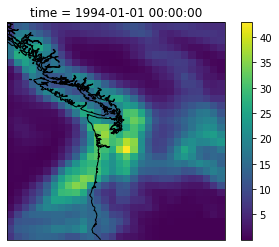

In [116]:
# make a little map
ax = plt.axes(projection=ccrs.PlateCarree())
output_conservative.isel(time=0).plot.pcolormesh(ax=ax);
ax.coastlines();

In [119]:
output_conservative

<xarray.DataArray (time: 8030, latitude: 30, longitude: 30)>
dask.array<_regrid, shape=(8030, 30, 30), dtype=float32, chunksize=(365, 30, 30), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) object 1994-01-01 00:00:00 ... 2015-12-31 00:00:00
  * longitude  (longitude) float64 230.0 230.5 231.0 231.5 ... 243.5 244.0 244.5
  * latitude   (latitude) float64 40.0 40.5 41.0 41.5 ... 53.0 53.5 54.0 54.5
Attributes:
    regrid_method:  conservative

In [ ]:
output_conservative.sel(latitude=40.)

In [ ]:
# now get Seattle timeseries from each of these ERA-5 versions.
# two of the datasets have [0,360] ranging longitude, need to convert. 
manual_conservative_regrid_around_seattle = output_conservative.sel(longitude=lon360(target_lon), latitude=target_lat, method="nearest").load()

In [126]:
output.lon

<xarray.DataArray 'lon' (lon: 30)>
array([230. , 230.5, 231. , 231.5, 232. , 232.5, 233. , 233.5, 234. , 234.5,
       235. , 235.5, 236. , 236.5, 237. , 237.5, 238. , 238.5, 239. , 239.5,
       240. , 240.5, 241. , 241.5, 242. , 242.5, 243. , 243.5, 244. , 244.5])
Coordinates:
  * lon      (lon) float64 230.0 230.5 231.0 231.5 ... 243.0 243.5 244.0 244.5

In [127]:
output_conservative.longitude

<xarray.DataArray 'longitude' (longitude: 30)>
array([230. , 230.5, 231. , 231.5, 232. , 232.5, 233. , 233.5, 234. ,
       234.5, 235. , 235.5, 236. , 236.5, 237. , 237.5, 238. , 238.5,
       239. , 239.5, 240. , 240.5, 241. , 241.5, 242. , 242.5, 243. ,
       243.5, 244. , 244.5])
Coordinates:
  * longitude  (longitude) float64 230.0 230.5 231.0 231.5 ... 243.5 244.0 244.5

Text(0.5, 1.0, 'Seattle annual precip')

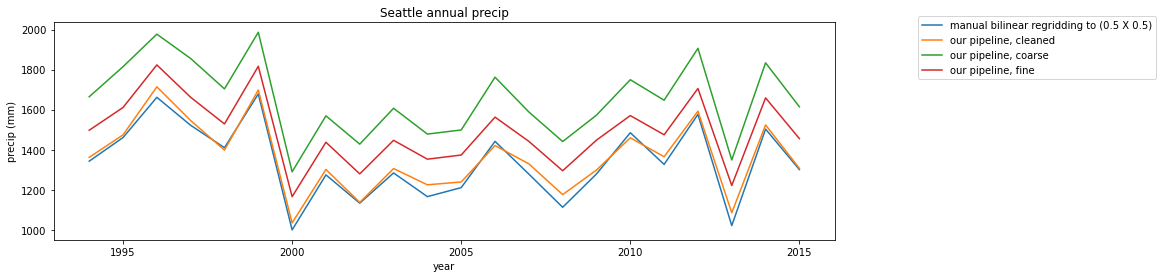

In [101]:
plt.figure(figsize=(14, 4))
manual_bilinear_regrid_around_seattle.groupby('time.year').sum().plot(label='manual bilinear regridding to (0.5 X 0.5)')
manual_conservative_regrid_around_seattle.groupby('time.year').sum().plot(label='manual conservative regridding to (0.5 X 0.5)')
pr_seattle_pipeline.groupby('time.year').sum().plot(label='our pipeline, cleaned')
pr_seattle_pipeline_coarse.groupby('time.year').sum().plot(label='our pipeline, coarse')
pr_seattle_pipeline_fine.groupby('time.year').sum().plot(label='our pipeline, fine')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('precip (mm)')
plt.title('Seattle annual precip')